In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno 

In [4]:
df = pd.read_csv("Bike_use.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,NaN,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,NaN,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


## Data Pre-Processing

### Finding Missing Values

In [93]:
missing_data = df.isnull()
missing_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


### Count Missing Values

In [94]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

datetime
False    10886
Name: datetime, dtype: int64

season
False    10886
Name: season, dtype: int64

holiday
False    10886
Name: holiday, dtype: int64

workingday
False    10886
Name: workingday, dtype: int64

weather
False    10886
Name: weather, dtype: int64

temp
False    10886
Name: temp, dtype: int64

atemp
False    10886
Name: atemp, dtype: int64

humidity
False    10880
True         6
Name: humidity, dtype: int64

windspeed
False    10886
Name: windspeed, dtype: int64

casual
False    10886
Name: casual, dtype: int64

registered
False    10886
Name: registered, dtype: int64

count
False    10886
Name: count, dtype: int64



### Replacing Missing Values

In [95]:
avg_humidity = df["humidity"].astype("float").mean(axis=0)
print("Average Humidity:", avg_humidity)

Average Humidity: 61.87950367647059


In [96]:
df["humidity"].replace(np.nan, avg_humidity, inplace=True)

In [97]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0000,0,1,1
5,01-01-2011 05:00,1,0,0,2,9.84,12.880,75.000000,6.0032,0,1,1
6,01-01-2011 06:00,1,0,0,1,9.02,13.635,80.000000,0.0000,2,0,2
7,01-01-2011 07:00,1,0,0,1,8.20,12.880,61.879504,0.0000,1,2,3
8,01-01-2011 08:00,1,0,0,1,9.84,14.395,75.000000,0.0000,1,7,8
9,01-01-2011 09:00,1,0,0,1,13.12,17.425,76.000000,0.0000,8,6,14


### Check if Missing values exist

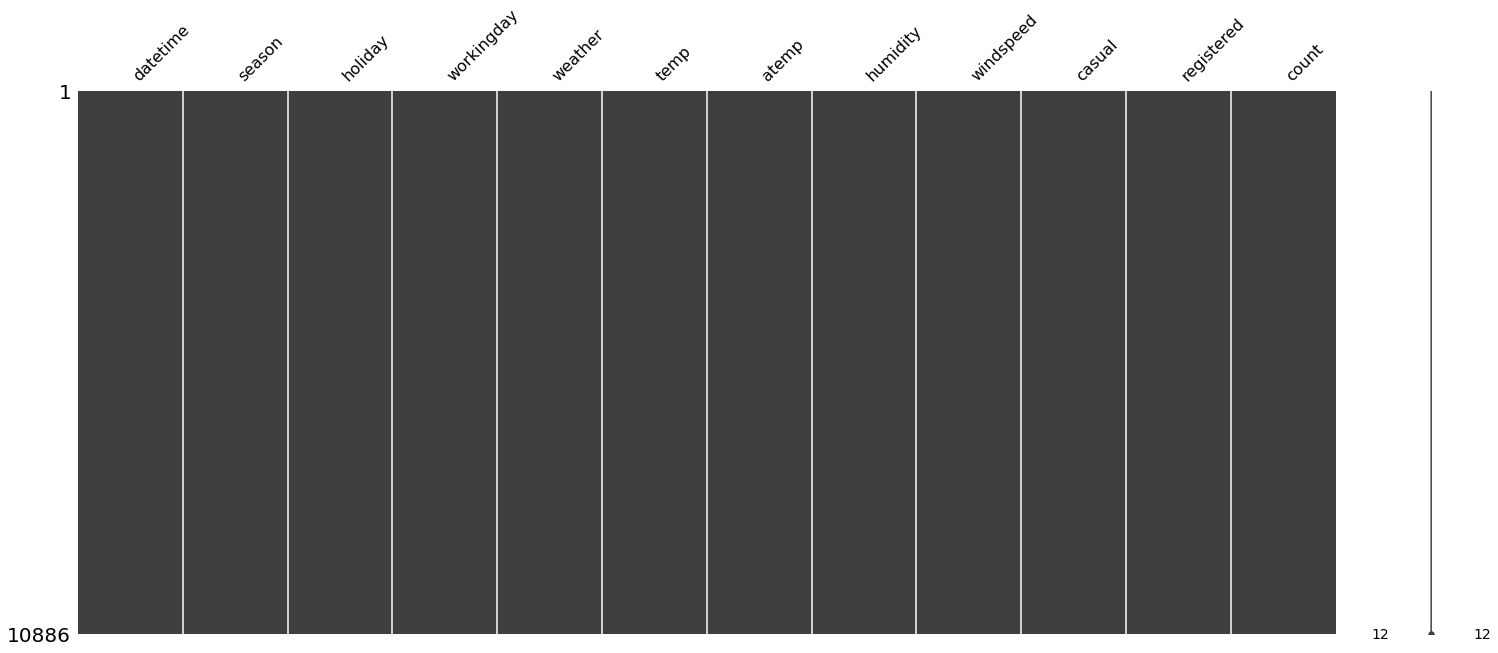

In [98]:
msno.matrix(df)

### Check Datatypes 

In [99]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## FEATURE ENGINEERING

### Split DateTime for getting better insights from data 

In [100]:
temp = pd.DatetimeIndex(df['datetime'])
df['year'] = temp.year
df['month'] = temp.month
df['hour'] = temp.hour
df['weekday'] = temp.weekday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81.000000,0.0,3,13,16,2011,1,0,5
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80.000000,0.0,8,32,40,2011,1,1,5
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80.000000,0.0,5,27,32,2011,1,2,5
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,61.879504,0.0,3,10,13,2011,1,3,5
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75.000000,0.0,0,1,1,2011,1,4,5


### Drop DateTime

In [101]:
df  = df.drop(["datetime"],axis=1)

## DATA VISUALIZATION

### Grouping by season, plot the box plot

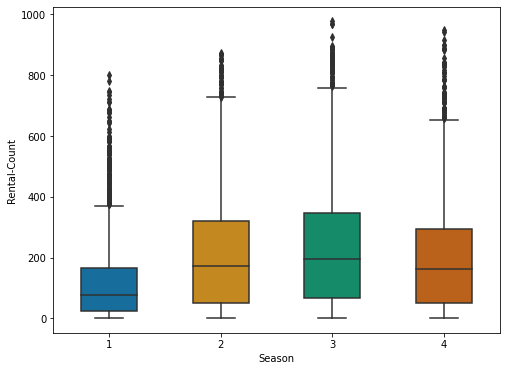

In [109]:
season_group= (df.groupby("season"))["count"].sum()
season_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='season',data=df,width=0.5,palette="colorblind")
plt.xlabel('Season')
plt.ylabel('Rental-Count')
plt.show()

### Grouping by weekday, plot the box plot

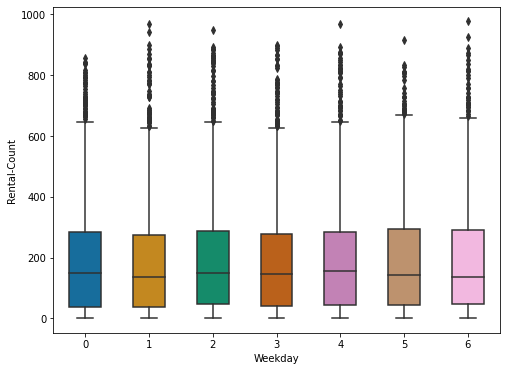

In [110]:
weekday_group= (df.groupby("weekday"))["count"].sum()
weekday_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weekday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Weekday')
plt.ylabel('Rental-Count')
plt.show()

### Seeing the difference between workday and non-workday 

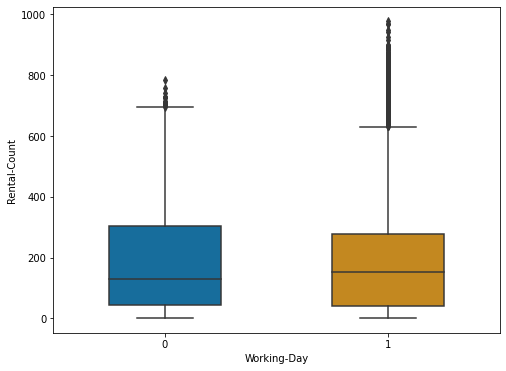

In [111]:
wd_group= (df.groupby("workingday"))["count"].sum()
wd_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='workingday',data=df,width=0.5,palette="colorblind")
plt.xlabel('Working-Day')
plt.ylabel('Rental-Count')
plt.show()

### Grouping by weather and plot the box plot 

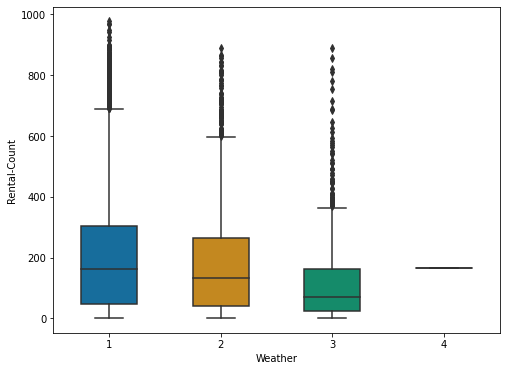

In [112]:
weather_group= (df.groupby("weather"))["count"].sum()
weather_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='weather',data=df,width=0.5,palette="colorblind")
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Weather')
plt.ylabel('Rental-Count')
plt.show()

### Group by season and see the difference between the 2 years 

Text(0, 0.5, 'Rental-Count')

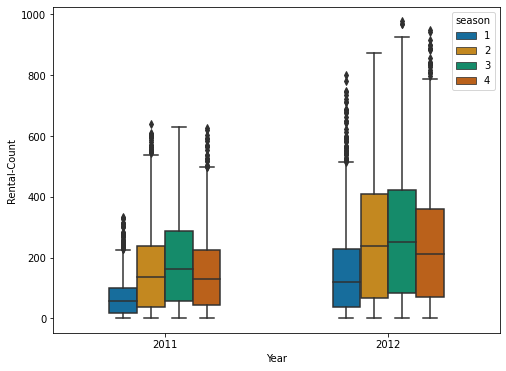

In [113]:
sns.boxplot(y='count',x='year',data=df,hue='season',width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')

### Annual change

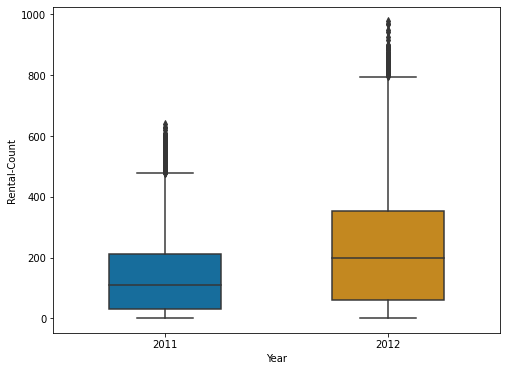

In [114]:
year_group= (df.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='year',data=df,width=0.5,palette="colorblind")
plt.xlabel('Year')
plt.ylabel('Rental-Count')
plt.show()

###  Monthly change

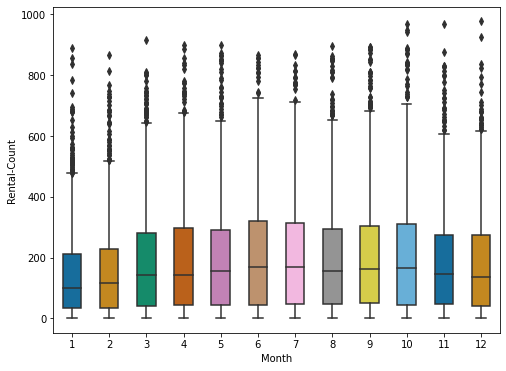

In [115]:
month_group= (df.groupby("month"))["count"].sum()
month_group.reset_index(name="total_rentals")
sns.boxplot(y='count',x='month',data=df,width=0.5,palette="colorblind")
plt.xlabel('Month')
plt.ylabel('Rental-Count')
plt.show()

###  Hourly change expressed in bar graph

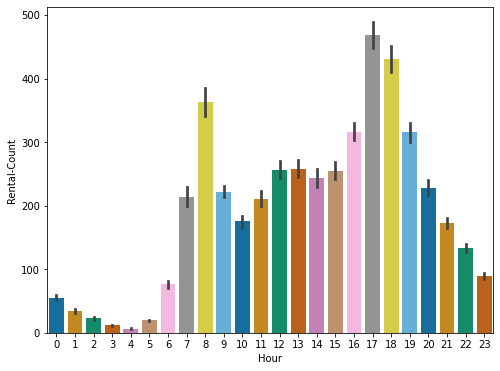

In [116]:
hour_group= (df.groupby("hour"))["count"].sum()
hour_group.reset_index(name="total_rentals")
sns.barplot(y='count',x='hour',data=df,palette="colorblind")
plt.xlabel('Hour')
plt.ylabel('Rental-Count')
plt.show()

### Average Users Count By Hour Of The Day Across Season

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

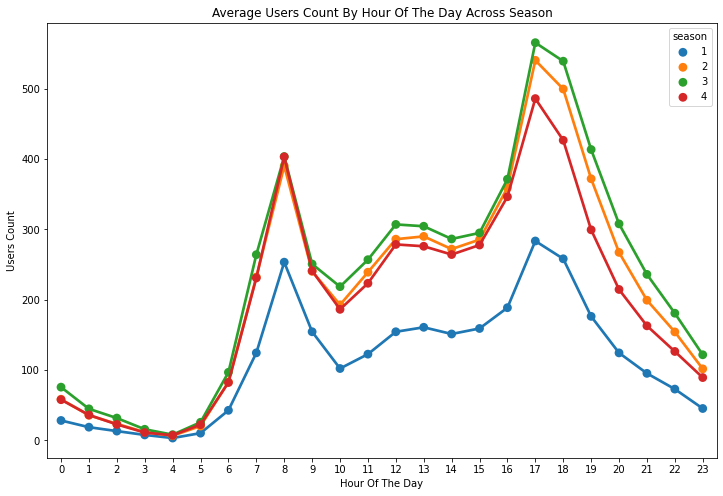

In [58]:
fig,(ax2)= plt.subplots(nrows=1)
fig.set_size_inches(12,8)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


## MODEL BUILDING 

### Understand dependencies between Attributes

In [12]:
corr = df.corr()
corr.style.background_gradient().set_precision(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
season,1,0.03,-0.008,0.009,0.3,0.3,0.2,-0.1,0.1,0.2,0.2,-0.005,0.4,-0.007,-0.01
holiday,0.03,1,-0.3,-0.007,0.0003,-0.005,0.002,0.008,0.04,-0.02,-0.005,0.01,-0.06,-0.0004,-0.08
workingday,-0.008,-0.3,1,0.03,0.03,0.02,-0.01,0.01,-0.3,0.1,0.01,-0.002,0.03,0.003,-0.3
weather,0.009,-0.007,0.03,1,-0.06,-0.06,0.4,0.007,-0.1,-0.1,-0.1,-0.01,-0.01,-0.02,-0.04
temp,0.3,0.0003,0.03,-0.06,1,1,-0.06,-0.02,0.5,0.3,0.4,0.06,0.04,0.1,-0.04
atemp,0.3,-0.005,0.02,-0.06,1,1,-0.04,-0.06,0.5,0.3,0.4,0.06,0.04,0.1,-0.04
humidity,0.2,0.002,-0.01,0.4,-0.06,-0.04,1,-0.3,-0.3,-0.3,-0.3,-0.08,0.04,-0.3,-0.006
windspeed,-0.1,0.008,0.01,0.007,-0.02,-0.06,-0.3,1,0.09,0.09,0.1,-0.02,-0.02,0.1,-0.03
casual,0.1,0.04,-0.3,-0.1,0.5,0.5,-0.3,0.09,1,0.5,0.7,0.1,0.01,0.3,0.1
registered,0.2,-0.02,0.1,-0.1,0.3,0.3,-0.3,0.09,0.5,1,1,0.3,0.06,0.4,-0.03


### Dependencies using HeatMap 

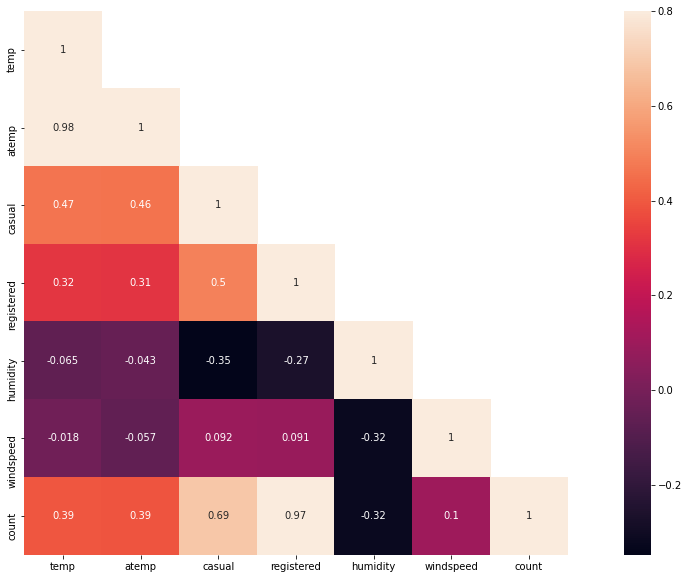

In [11]:
corrMatt = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)